# MMF1921 (Summer 2025) - Project 1
 
 The purpose of this program is to implement the following factor models
 
     a) Multi-factor OLS regression
     b) Fama-French 3-factor model
     c) LASSO
     d) Best Subset Selection
 
 and to use these factor models to estimate the asset expected returns and covariance matrix. 
 
These parameters will then be used to test the out-of-sample performance using MVO to construct optimal portfolios.
 
 Use can use this template to write your program.

     Student Name:
     Student ID:

In [1]:
import time
import math
from scipy.stats import gmean
import matplotlib.pyplot as plt
from functions.BSS import *
from functions.FF import *
from functions.LASSO import *
from functions.MVO import *
from functions.OLS import *
import pandas as pd

adjClose = pd.read_csv("MMF1921_AssetPrices.csv", index_col=0)
factorRet = pd.read_csv("MMF1921_FactorReturns.csv", index_col=0)

In [2]:
adjClose.index = pd.to_datetime(adjClose.index)
factorRet.index = pd.to_datetime(factorRet.index)

In [3]:
#rf and factor returns
riskFree = factorRet['RF']
factorRet = factorRet.loc[:,factorRet.columns != 'RF']

In [4]:
#Identify the tickers and the dates
tickers = adjClose.columns
dates   = factorRet.index

In [5]:
# Calculate the stocks monthly excess returns
# pct change and drop the first null observation
returns = adjClose.pct_change(1).iloc[1:, :]

returns = returns  - np.diag(riskFree.values) @ np.ones_like(returns.values)
# Align the price table to the asset and factor returns tables by discarding the first observation.
adjClose = adjClose.iloc[1:,:]

In [6]:
assert adjClose.index[0] == returns.index[0]
assert adjClose.index[0] == factorRet.index[0]

In [7]:
factorRet
# rename columns with no spaces
factorRet.columns = factorRet.columns.str.replace(' ', '')



In [8]:
returns

,F,CAT,DIS,MCD,KO,PEP,WMT,C,WFC,JPM,AAPL,IBM,PFE,JNJ,XOM,MRO,ED,T,VZ,NEM
Date,,,,,,,,,,,,,,,,,,,,
2006-01-31,0.120718,0.176565,0.052403,0.034756,0.023044,-0.035660,-0.018244,-0.043681,-0.010981,0.006606,0.046855,-0.014449,0.097701,-0.046096,0.113644,0.257284,0.011177,0.070249,0.061208,0.153803
2006-02-28,-0.074496,0.072889,0.102487,-0.006256,0.010858,0.030353,-0.019665,0.002888,0.034763,0.031569,-0.096368,-0.013995,0.025742,0.004236,-0.052251,-0.080411,-0.015327,0.059798,0.061035,-0.147089
2006-03-31,-0.004955,-0.021078,-0.007273,-0.019455,0.001196,-0.021782,0.041595,0.014846,-0.008840,0.008454,-0.087946,0.024092,-0.052192,0.023533,0.021397,0.075195,-0.055368,-0.023635,0.006982,-0.021234
2006-04-30,-0.117922,0.054510,-0.001090,0.002512,-0.001450,0.004187,-0.050382,0.064753,0.071866,0.094983,0.118690,-0.005176,0.012853,-0.013901,0.032877,0.038280,-0.012336,-0.022110,-0.022179,0.121087
2006-05-31,0.025916,-0.041137,0.086544,-0.044798,0.045033,0.033818,0.075497,-0.017313,-0.030615,-0.064679,-0.155174,-0.030421,-0.061277,0.029544,-0.033864,-0.053583,0.032254,-0.010023,-0.059401,-0.110708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-31,-0.004939,-0.009987,-0.015729,-0.009530,-0.004784,-0.013214,-0.014548,0.089506,0.067255,0.054982,0.023418,-0.002487,-0.048836,-0.040876,-0.012046,0.104668,-0.052257,-0.055871,-0.055786,-0.131109
2016-09-30,-0.042263,0.083021,-0.017138,-0.002794,-0.017692,0.018723,0.009318,-0.010883,-0.128546,-0.013681,0.065304,-0.000389,-0.026924,-0.010339,0.001407,0.052397,0.000464,-0.006805,-0.006888,0.027916
2016-10-31,-0.015228,-0.051661,-0.002031,-0.024385,0.001690,-0.014634,-0.029318,0.040452,0.038870,0.047392,0.004134,-0.032683,-0.063973,-0.018316,-0.045571,-0.166550,0.003120,-0.083161,-0.064214,-0.057466


# 2. Define your initial parameters

In [9]:
#Initial budget to invest ($100,000)
initialVal = 100000

#Start of in-sample calibration period
calStart = pd.to_datetime('2008-01-01', format = '%Y-%m-%d')
calEnd   = calStart + pd.offsets.DateOffset(years=4) - pd.offsets.DateOffset(days=1)

#Start of out-of-sample test period
testStart = pd.to_datetime('2012-01-01', format = '%Y-%m-%d')
testEnd   = testStart + pd.offsets.DateOffset(years=1) - pd.offsets.DateOffset(days=1)

#Number of investment periods (each investment period is 1 year long)
NoPeriods = 5

#Factor models
#Note: You must populate the functions OLS.py, FF.py, LASSO.py and BSS.py with your own code.
FMList = [OLS, FF, LASSO, BSS]

NoModels = len(FMList)

#Tags for the portfolios under the different factor models
tags = ['OLS portfolio', 'FF portfolio', 'LASSO portfolio', 'BSS portfolio']

## 2.1. Find the optimal K for BSS Model


Restricted license - for non-production use only - expires 2026-11-23
          1         2         3         4         5         6         7  \
0  0.370999  0.438940  0.479656  0.499564  0.505712  0.506151  0.500139   
1  0.338875  0.421346  0.462858  0.481144  0.490257  0.496471  0.493609   
2  0.307754  0.392780  0.440508  0.453038  0.463703  0.462142  0.456508   
3  0.241419  0.361307  0.413111  0.429810  0.433736  0.426110  0.417212   
4  0.305280  0.409791  0.442824  0.466565  0.469068  0.465783  0.459306   

          8  
0  0.491552  
1  0.486034  
2  0.447351  
3  0.408813  
4  0.449604  


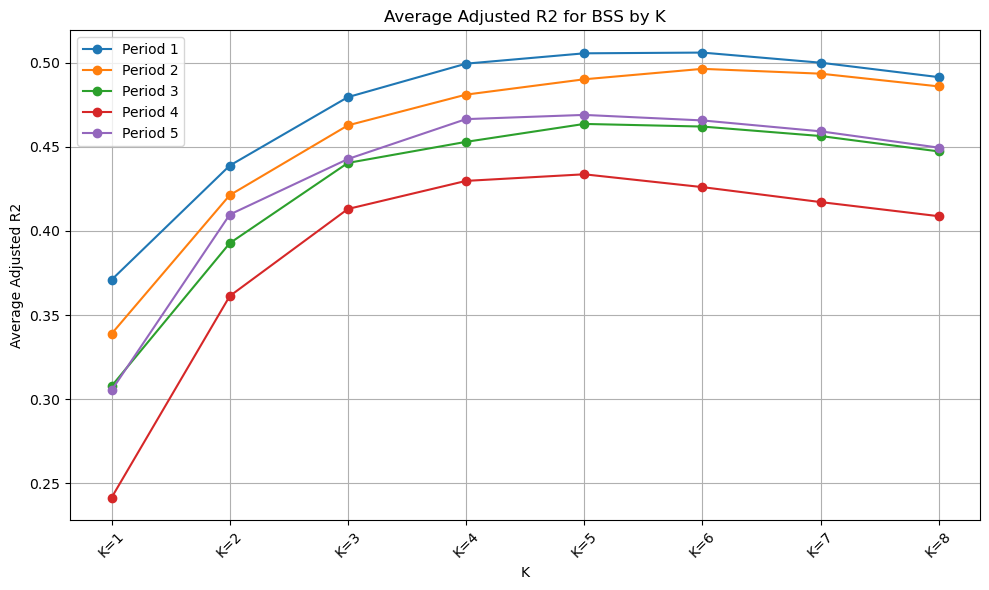

In [10]:
#Initial budget to invest ($100,000)
initialVal = 100000

#Start of in-sample calibration period
calStart = pd.to_datetime('2008-01-01', format = '%Y-%m-%d')
calEnd   = calStart + pd.offsets.DateOffset(years=4) - pd.offsets.DateOffset(days=1)

#Start of out-of-sample test period
testStart = pd.to_datetime('2012-01-01', format = '%Y-%m-%d')
testEnd   = testStart + pd.offsets.DateOffset(years=1) - pd.offsets.DateOffset(days=1)

#Number of investment periods (each investment period is 1 year long)
NoPeriods = 5

#Factor models
#Note: You must populate the functions OLS.py, FF.py, LASSO.py and BSS.py with your own code.
FMList = [OLS, FF, LASSO, BSS]

NoModels = len(FMList)

#Tags for the portfolios under the different factor models
tags = ['OLS portfolio', 'FF portfolio', 'LASSO portfolio', 'BSS portfolio']


Ks = list(range(1, 9))
# DataFrame to hold avg adj-R2: rows = periods, cols = K
avg_adjR2 = pd.DataFrame(index=range(NoPeriods), columns=Ks, dtype=float)

for t in range(NoPeriods):
    # 1) build your in-sample window:
    periodReturns = returns[(calStart <= returns.index) & (returns.index <= calEnd)]
    periodFactRet = factorRet[(calStart <= factorRet.index) & (factorRet.index <= calEnd)]
    lambda_ = 1
    # 2) for each K, fit BSS and record mean(adj_R2)
    for K in Ks:
        _, _, adj_R2 = BSS(periodReturns, periodFactRet, lambda_, K)
        avg_adjR2.at[t, K] = adj_R2.mean()

    # 3) update calStart/calEnd for next period
    calStart = calStart + pd.DateOffset(years=1)
    calEnd   = calStart + pd.DateOffset(years=4) - pd.DateOffset(days=1)

    # print(calStart, calEnd)

# now avg_adjR2 is your matrix: index = period #, columns = K
print(avg_adjR2)

# Make the column be K = 1, 2, ..., 8, rows be period 1, 2, ..., 5

avg_adjR2.columns = [f'K={K}' for K in Ks]
avg_adjR2.index = [f'Period {t+1}' for t in range(NoPeriods)]

# Plot the adj-R2 for each K
plt.figure(figsize=(10, 6))
plt.plot(avg_adjR2.T, marker='o')
plt.title('Average Adjusted R2 for BSS by K')
plt.xlabel('K')
plt.ylabel('Average Adjusted R2')
plt.xticks(rotation=45)
plt.legend(avg_adjR2.index, loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()







### Find the optimal K for each period. 

In [11]:
# find the K that maximizes the average adj-R2 for each period 

K_max = avg_adjR2.idxmax(axis=1)

print(K_max)

# convert into list
K_max = K_max.values.tolist()

# convert into int
K_max = [int(k.split('=')[1]) for k in K_max]

# print the K_max list
print(K_max)

# Now we can use the K_max list to build the portfolios for each period




Period 1    K=6
Period 2    K=6
Period 3    K=5
Period 4    K=5
Period 5    K=5
dtype: object
[6, 6, 5, 5, 5]


## 2.2. Find the Optimal Lambda for the LASSO Model

In [12]:
# define a separate LASSO just for choosing Lambda. 

from sklearn.linear_model import Lasso

def LASSO_Test(returns, factRet, lambda_, K):
    """
    Use this function for the LASSO model. Note that you will not use K
    in this model (K is for BSS).

    Returns:
      mu      : n-vector of expected returns
      Q       : n×n asset covariance matrix
      adj_R2  : n-vector of adjusted R² for each asset regression
    """
    # ----------------------------------------------------------------------
    # Align on dates & drop missing
    data = returns.join(factRet, how='inner').dropna()

    # Factor matrix F (T×8) and compute its mean/covariance
    factor_cols = ['Mkt_RF','SMB','HML','RMW','CMA','Mom','ST_Rev','LT_Rev']
    F = data[factor_cols].values
    T, p = F.shape
    f_mean  = F.mean(axis=0)
    Sigma_f = np.cov(F, rowvar=False, ddof=1)

    assets = returns.columns
    N = len(assets)

    # Storage
    alpha   = np.zeros(N)
    B       = np.zeros((N, p))
    eps_var = np.zeros(N)
    adj_R2  = np.zeros(N)
    p_effs = np.zeros(N)

    # Fit a Lasso for each asset
    for i, asset in enumerate(assets):
        y = data[asset].values
        model = Lasso(alpha=lambda_, fit_intercept=True, max_iter=10000)
        model.fit(F, y)

        alpha[i] = model.intercept_
        B[i, :]  = model.coef_
        resid    = y - model.predict(F)
        eps_var[i] = np.var(resid, ddof=1)

        # Compute R²
        SSR = np.sum(resid**2)
        SST = np.sum((y - y.mean())**2)
        R2  = 1 - SSR / SST

        # count only non-zero factors
        p_eff = np.count_nonzero(model.coef_)
        p_effs[i] = p_eff
        # adjusted R² penalizes only the actually used predictors
        adj_R2[i] = 1 - (1 - R2) * (T - 1) / (T - p_eff - 1)

    # Expected returns
    mu = alpha + B.dot(f_mean)          # (n,)

    # Covariance
    Q  = B.dot(Sigma_f).dot(B.T) + np.diag(eps_var)  # (n, n)
    # ----------------------------------------------------------------------

    return mu, Q, adj_R2, p_effs

### Initialize parameters

In [13]:
#Initial budget to invest ($100,000)
initialVal = 100000

#Start of in-sample calibration period
calStart = pd.to_datetime('2008-01-01', format = '%Y-%m-%d')
calEnd   = calStart + pd.offsets.DateOffset(years=4) - pd.offsets.DateOffset(days=1)

#Start of out-of-sample test period
testStart = pd.to_datetime('2012-01-01', format = '%Y-%m-%d')
testEnd   = testStart + pd.offsets.DateOffset(years=1) - pd.offsets.DateOffset(days=1)

#Number of investment periods (each investment period is 1 year long)
NoPeriods = 5

#Factor models
#Note: You must populate the functions OLS.py, FF.py, LASSO.py and BSS.py with your own code.
FMList = [OLS, FF, LASSO, BSS]

NoModels = len(FMList)

#Tags for the portfolios under the different factor models
tags = ['OLS portfolio', 'FF portfolio', 'LASSO portfolio', 'BSS portfolio']

In [14]:


# your BSS‐unused K placeholder
K = None

# choose your λ‐grid
lambdas = np.logspace(-5, -1, 9)   # e.g. [1e-5, 1e-4.5, …, 1e-1]

# prepare the result matrix
count_within_2_5 = pd.DataFrame(
    index=range(NoPeriods),
    columns=lambdas,
    dtype=int
)

for t in range(NoPeriods):
    # build your in‐sample window
    periodReturns = returns[(calStart <= returns.index) & (returns.index <= calEnd)]
    periodFactRet = factorRet[(calStart <= factorRet.index) & (factorRet.index <= calEnd)]

    for lam in lambdas:
        # call your LASSO function once per period+λ
        _, _, _, nnz = LASSO_Test(periodReturns, periodFactRet, lam, K)

        # count how many assets have between 2 and 5 non-zero betas
        count_within_2_5.at[t, lam] = np.sum((nnz >= 2) & (nnz <= 5))

    # roll your dates forward
    calStart += pd.DateOffset(years=1)
    calEnd   = calStart + pd.DateOffset(years=4) - pd.DateOffset(days=1)

# now count_within_2_5[t, lam] tells you how many assets in period t
# had between 2–5 non‐zero betas under λ=lam

# to pick the “best” λ each period:
best_lambda_per_period = count_within_2_5.idxmax(axis=1)

print(count_within_2_5)
print("Best λ each period:")
print(best_lambda_per_period)


   0.000010  0.000032  0.000100  0.000316  0.001000  0.003162  0.010000  \
0       0.0       1.0      13.0      15.0       4.0       4.0       0.0   
1       0.0       1.0      12.0      13.0       5.0       3.0       0.0   
2       0.0       4.0      18.0      10.0       2.0       0.0       0.0   
3       0.0       5.0      18.0       8.0       2.0       0.0       0.0   
4       1.0       5.0      16.0      12.0       2.0       0.0       0.0   

   0.031623  0.100000  
0       0.0       0.0  
1       0.0       0.0  
2       0.0       0.0  
3       0.0       0.0  
4       0.0       0.0  
Best λ each period:
0    0.000316
1    0.000316
2    0.000100
3    0.000100
4    0.000100
dtype: float64


In [15]:
# save the best lambda for each period in a list
best_lambda = best_lambda_per_period.values.tolist()

best_lambda

[0.00031622776601683794, 0.00031622776601683794, 0.0001, 0.0001, 0.0001]

# 3. Construct and rebalance your portfolios

Here you will estimate your input parameters (exp. returns and cov. matrix etc) from the Fama-French factor models.
You will have to re-estimate your parameters at the start of each rebalance period, and then re-optimize and rebalance your portfolios accordingly.

Ensure you re-initialize the dates above if you run this cell repeatedly. 

 3.1 Initialize

In [16]:
#Initial budget to invest ($100,000)
initialVal = 100000

#Start of in-sample calibration period
calStart = pd.to_datetime('2008-01-01', format = '%Y-%m-%d')
calEnd   = calStart + pd.offsets.DateOffset(years=4) - pd.offsets.DateOffset(days=1)

#Start of out-of-sample test period
testStart = pd.to_datetime('2012-01-01', format = '%Y-%m-%d')
testEnd   = testStart + pd.offsets.DateOffset(years=1) - pd.offsets.DateOffset(days=1)

#Number of investment periods (each investment period is 1 year long)
NoPeriods = 5

#Factor models
#Note: You must populate the functions OLS.py, FF.py, LASSO.py and BSS.py with your own code.
FMList = [OLS, FF, LASSO, BSS]

NoModels = len(FMList)

#Tags for the portfolios under the different factor models
tags = ['OLS portfolio', 'FF portfolio', 'LASSO portfolio', 'BSS portfolio']

In [17]:
# Initiate counter for the number of observations per investment period
toDay = 0

# Preallocate the space for the per period value of the portfolios 
currentVal = {i:np.zeros(NoPeriods) for i in range(NoModels)}

# Number of assets
n  = len(tickers)

# Preallocate space for the portfolio weights
x  = {i:np.zeros([n, NoPeriods]) for i in range(NoModels)}

# Initialize dictionaries to hold Q, mu and the number of shares 
# for each model. These are overwritten at each rebalancing point
mu = {}
Q = {}
NoShares ={}

# Empty lists to measure the value of the portfolio over the period
portfValue = {i:[] for i in range(NoModels)}

#--------------------------------------------------------------------------
# Set the value of lambda and K for the LASSO and BSS models, respectively
# We are using a different lambda\K for each period, so we need to set it up
#--------------------------------------------------------------------------


lambda_list = best_lambda
K_list    = K_max


# storage for average adj-R2
adjR2 = {i: np.zeros(NoPeriods) for i in range(NoModels)}


for t in range(NoPeriods):

    # pull the correct λ and K for this period
    lambda_ = lambda_list[t]
    K = K_list[t]


    # Subset the returns and factor returns corresponding to the current calibration period.
    periodReturns = returns[(calStart <= returns.index)&(returns.index <= calEnd)]
    periodFactRet = factorRet[(calStart <= factorRet.index) &(factorRet.index <= calEnd)]
    # print(periodFactRet.columns)
    current_price_idx = (calEnd - pd.offsets.DateOffset(days = 7) <= adjClose.index)&(adjClose.index <= calEnd)
    currentPrices = adjClose[current_price_idx]
    
    # Subset the prices corresponding to the current out-of-sample test period.
    periodPrices_idx = (testStart <= adjClose.index)&(adjClose.index <= testEnd)
    periodPrices = adjClose[periodPrices_idx]

    assert len(currentPrices) == 1
    # Set the initial value of the portfolio or update the portfolio value
    if t == 0:
        for i in range(NoModels):
            currentVal[i][0] = initialVal # all models start with the same amount of $
    else:
        for i in range(NoModels):
            currentVal[i][t] = (currentPrices @  NoShares[i].values.T).squeeze()
    
    # Update counter for the number of observations per investment period
    fromDay = toDay
    toDay   = toDay + len(periodPrices)

    # Calculate 'mu' and 'Q' using the 4 factor models.
    # Note: You need to write the code for the 4 factor model functions. 
    for i in range(NoModels):
        
        mu[i], Q[i], adj_R2  = FMList[i](periodReturns, periodFactRet, lambda_, K)
        
        adjR2[i][t] = adj_R2.mean()    
    # Optimize your portfolios to get the weights 'x'
    # Note: You need to write the code for MVO with no short sales
    for i in range(NoModels):
        
        # Define the target return as the geometric mean of the market 
        # factor for the current calibration period
        targetRet = gmean(periodFactRet.iloc[:,0] + 1) - 1 
        
        x[i][:,t] = MVO(mu[i], Q[i], targetRet) 

    # Calculate the optimal number of shares of each stock you should hold
    for i in range(NoModels):
        
        # Number of shares your portfolio holds per stock
        NoShares[i] = x[i][:,t]*currentVal[i][t]/currentPrices
        
        # Weekly portfolio value during the out-of-sample window
        portfValue[i].append(periodPrices @ NoShares[i].values.T)
        

    # Update your calibration and out-of-sample test periods
    calStart = calStart + pd.offsets.DateOffset(years=1)
    calEnd   = calStart + pd.offsets.DateOffset(years=4) - pd.offsets.DateOffset(days=1)
    
    testStart = testStart + pd.offsets.DateOffset(years=1)
    testEnd   = testStart + pd.offsets.DateOffset(years=1) - pd.offsets.DateOffset(days=1)
    
for i in range(NoModels):
    portfValue[i] = pd.concat(portfValue[i], axis = 0)
    
# Overwrite into a dataframe
portfValue = pd.DataFrame([portfValue[i].values.squeeze() for i in range(NoModels)], 
                          index = tags, columns = portfValue[0].index).T


# ------------------------------------------------------------------------
# AFTER the loop: build final DataFrame of average adj-R2
# ------------------------------------------------------------------------
# use your tags or simply model indices as column names
adjR2_df = pd.DataFrame(adjR2, index=[f"Period_{t}" for t in range(NoPeriods)])
adjR2_df.columns = tags 


In [18]:
portfValue

,OLS portfolio,FF portfolio,LASSO portfolio,BSS portfolio
Date,,,,
2012-01-31,98591.215634,98413.389173,98502.522414,98516.829547
2012-02-29,98169.799657,97871.757888,98316.692726,98139.918212
2012-03-31,99661.609418,99187.470881,99547.607055,99446.411306
2012-04-30,99737.827597,99126.722834,99452.709718,99725.372183
2012-05-31,100976.848892,100259.519471,99881.965600,101168.955108
2012-06-30,104702.989533,104200.364786,104202.041252,104921.148343
2012-07-31,108375.995172,107846.839379,107560.380508,108785.177454
2012-08-31,105686.393146,105374.243727,105362.588436,106133.269986
2012-09-30,107136.967389,106628.893350,107167.674953,107627.393612


# 4. Results

In [19]:
#--------------------------------------------------------------------------
# 4.1 Evaluate any measures of fit of the regression models to assess their
# in-sample quality. You may want to modify Section 3 of this program to
# calculate the quality of fit each time the models are recalibrated.
#--------------------------------------------------------------------------
print("Average adjusted R2 (across asset) for each model:")

# make adjR2_df columns be the model name
# make the rows be the period # (1, 2, 3, 4, 5)
adjR2_df.columns = tags
adjR2_df.index = [f'Period {t+1}' for t in range(NoPeriods)]
print(adjR2_df)

#--------------------------------------------------------------------------
# 4.2 Calculate the portfolio average return, variance (or standard 
# deviation), and any other performance and/or risk metric you wish to 
# include in your report.
#--------------------------------------------------------------------------

print("Portfolio performance metrics:")
port_return = portfValue.pct_change(1).iloc[1:, :]
# 1) geometric mean monthly return per portfolio
gm_monthly = port_return.add(1).agg(lambda x: gmean(x), axis=0) - 1

# 2) annualized return
ann_return = (1 + gm_monthly) ** 12 - 1

# 3) annualized volatility
ann_vol = port_return.std(axis=0) * np.sqrt(12)

# 4) Sharpe ratio (assumes rf=0)
sharpe = ann_return / ann_vol

# 5) Sortino ratio
#    - compute monthly downside dev: sqrt(mean(min(r,0)^2))
downside_monthly = np.sqrt((np.minimum(port_return, 0) ** 2).mean(axis=0))
downside_annual  = downside_monthly * np.sqrt(12)
sortino = ann_return / downside_annual

# assemble into one DataFrame
metrics = pd.DataFrame({
    'Ann Return':  ann_return,
    'Ann Vol':     ann_vol,
    'Sharpe':      sharpe,
    'Sortino':     sortino
})

print(metrics)







Average adjusted R2 (across asset) for each model:
          OLS portfolio  FF portfolio  LASSO portfolio  BSS portfolio
Period 1       0.479690      0.435810         0.433274       0.506151
Period 2       0.476705      0.398409         0.385920       0.496471
Period 3       0.436404      0.347258         0.392984       0.463703
Period 4       0.397364      0.280011         0.357184       0.433736
Period 5       0.439286      0.341069         0.404051       0.469068
Portfolio performance metrics:
                 Ann Return   Ann Vol    Sharpe   Sortino
OLS portfolio      0.084412  0.090943  0.928185  1.643578
FF portfolio       0.084585  0.091130  0.928178  1.618717
LASSO portfolio    0.087818  0.090676  0.968478  1.735065
BSS portfolio      0.083374  0.094156  0.885491  1.549669


<Figure size 640x480 with 0 Axes>

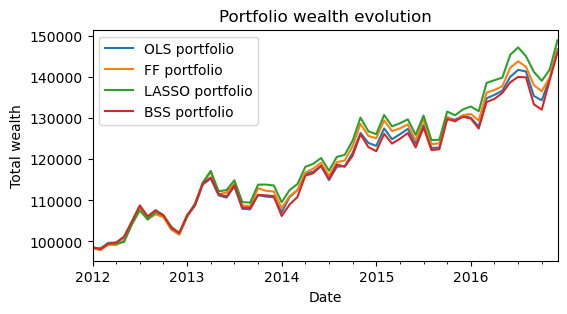

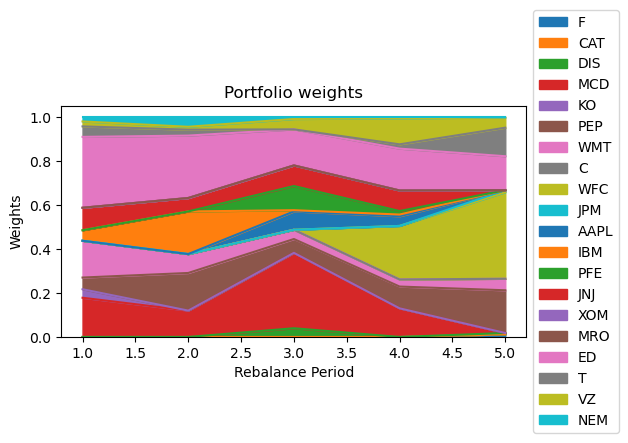

In [20]:
#--------------------------------------------------------------------------
# 4.3 Plot the portfolio wealth evolution 
# 
# Note: The code below plots all portfolios onto a single plot. However,
# you may want to split this into multiple plots for clarity, or to
# compare a subset of the portfolios. 
#--------------------------------------------------------------------------
# Calculate the dates of the out-of-sample period

fig = plt.figure(1)
portfValue.plot(title = 'Portfolio wealth evolution',
                ylabel = 'Total wealth',
                figsize = (6, 3),
                legend = True)
plt.savefig("images/wealth.svg")

#--------------------------------------------------------------------------
# 4.4 Plot the portfolio weights period-over-period
#--------------------------------------------------------------------------
# OLS Portfolio weights

fig2 = plt.figure(2)
x[0][x[0] < 0] = 0
weights = pd.DataFrame(x[0][(x[0] >0).any(axis=1)], index = tickers[(x[0] >0).any(axis=1)])
weights.columns = [col + 1 for col in weights.columns]
weights.T.plot.area(title = 'Portfolio weights',
                  ylabel = 'Weights', xlabel = 'Rebalance Period',
                  figsize = (6, 3),
                  legend = True, stacked = True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.savefig("images/weights.svg")
#
# ###########################################################################
# # Program End